# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [494]:
import pandas as pd
clientes_df = pd.read_csv("CadastroClientes.csv", sep = ";")

base_df = pd.read_excel("BaseServiçosPrestados.xlsx")
funcionarios_df = pd.read_csv("CadastroFuncionarios.csv", sep = ";", decimal = ",")
# display(funcionarios_df)
# salarios = funcionarios_df.groupby(['Salario Base', 'Impostos', 'Beneficios']).sum().sort_values(['ID Funcionário'] , ascending = False)
# display(salarios)
# Questão 01:
salario_base = sum(funcionarios_df['Salario Base'])

impostos = sum(funcionarios_df['Impostos'])

beneficios =sum(funcionarios_df['Beneficios'])

VT = sum(funcionarios_df['VT'])

VR = sum(funcionarios_df['VR'])

print('O valor gasto com os salarios dos funcionários no total foi de R$ {:,.2f}'.format(salario_base + impostos + beneficios + VT + VR))












O valor gasto com os salarios dos funcionários no total foi de R$ 2,717,493.22


In [495]:
#Questão 02:
clientes_id = clientes_df.merge(base_df , on='ID Cliente')

clientes_id = clientes_id.set_index('ID Cliente')

clientes_id = clientes_id.drop(['Codigo do Servico','Cliente','ID Funcionário'], axis = 1)

clientes_id['Fat Individual'] = clientes_id['Valor Contrato Mensal'] * clientes_id['Tempo Total de Contrato (Meses)']

faturamento = sum(clientes_id['Fat Individual'])

print('O faturamento da empresa foi de R$ {:,}'.format(faturamento))


O faturamento da empresa foi de R$ 5,519,160


In [486]:
#Questão 03:

funcionario_pr = funcionarios_df.merge(base_df, on = 'ID Funcionário')

unicos = funcionario_pr.groupby(['ID Funcionário', 'Nome Completo']).sum()

porcentagem = len(unicos) / len(funcionarios_df['Nome Completo'])

print('A porcentagem de funcionários que fecharam serviços foi {:.2%}'.format(porcentagem))


A porcentagem de funcionários que fecharam serviços foi 86.84%



Total de contratos da área Administrativa: 63
Total de contratos da área de Operações: 48
Total de contratos da área de Logística: 40
Total de contratos da área Comercial: 44
Total de contratos da área Financeira: 42


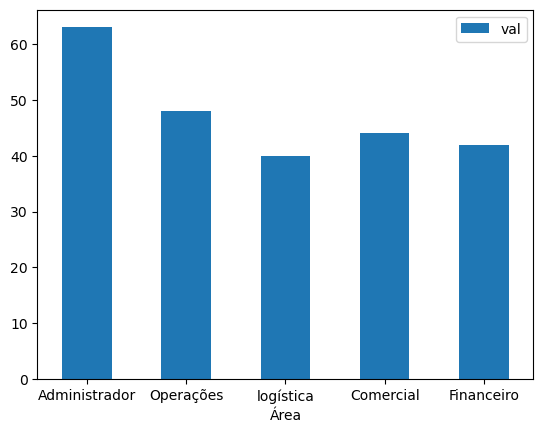

In [517]:
#Questão 04:
# display(funcionarios_df)
unidades = funcionario_pr['Area']
adm = 0
ope = 0
log = 0
com = 0
fin = 0
for i,item in enumerate(unidades):
    if item == 'Administrativo':
        adm += 1
    if item == 'Operações':
        ope += 1
    if item == 'Logística':
        log += 1
    if item == 'Comercial':
        com += 1
    if item == 'Financeiro':
        fin += 1
        
ploti = ({'Área':['Administrador', 'Operações', 'logística', 'Comercial', 'Financeiro'],'val':[adm,ope,log,com,fin]})
graf = pd.DataFrame(ploti)
graf.plot.bar(x = 'Área', y = 'val', rot=0)
print("\nTotal de contratos da área Administrativa: {}\nTotal de contratos da área de Operações: {}\nTotal de contratos da área de Logística: {}\nTotal de contratos da área Comercial: {}\nTotal de contratos da área Financeira: {}".format(adm,ope,log,com,fin))
# display(unidades)



Total de funcionários da Área Administrativa: 26
Total de funcionários da Área Operações: 23
Total de funcionários da Área Logística: 21
Total de funcionários da Área Comercial: 26
Total de funcionários da Área Financeiro: 18


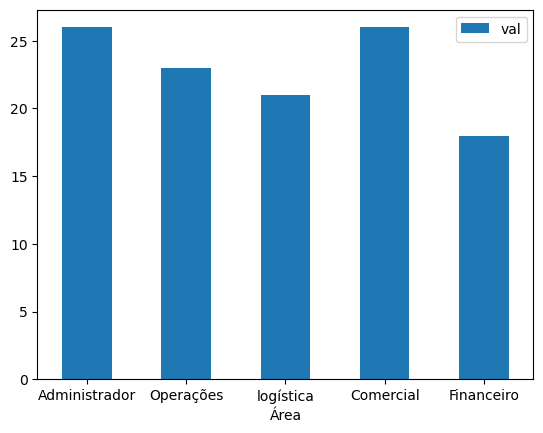

In [516]:
#Questão 05:
unidades = funcionarios_df['Area']
adm = 0
ope = 0
log = 0
com = 0
fin = 0
for i,item in enumerate(unidades):
    if item == 'Administrativo':
        adm += 1
    if item == 'Operações':
        ope += 1
    if item == 'Logística':
        log += 1
    if item == 'Comercial':
        com += 1
    if item == 'Financeiro':
        fin += 1
        
ploti = ({'Área':['Administrador', 'Operações', 'logística', 'Comercial', 'Financeiro'],'val':[adm,ope,log,com,fin]})
graf = pd.DataFrame(ploti)
graf.plot.bar(x = 'Área', y = 'val', rot=0)
print('\nTotal de funcionários da Área Administrativa: {}\nTotal de funcionários da Área Operações: {}\nTotal de funcionários da Área Logística: {}\nTotal de funcionários da Área Comercial: {}\nTotal de funcionários da Área Financeiro: {}'.format(adm,ope,log,com,fin))
# display(unidades)

In [490]:
#Questão 06:
valor = clientes_df['Valor Contrato Mensal']
media = clientes_df['Valor Contrato Mensal'].mean()
print('valor mensal R${:,.2f}'.format(media))


valor mensal R$2,502.56
